In [1]:
# Initial Python environment setup...
import numpy as np # linear algebra
import pandas as pd # CSV file I/O (e.g. pd.read_csv)
import os # reading the input files we have access to

print(os.listdir('../input'))

['GCP-Coupons-Instructions.rtf', 'sample_submission.csv', 'test.csv', 'train.csv']


In [2]:
train_df =  pd.read_csv('../input/train.csv',nrows=10_000_000)
train_df.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [3]:
#get a sense how training data looks like
train_df[:5]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [4]:
plot = train_df.plot.scatter('passenger_count','fare_amount')

In [5]:
train_df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1.000000e+07,1.000000e+07,1.000000e+07,9.999931e+06,9.999931e+06,1.000000e+07
mean,1.133854e+01,-7.250775e+01,3.991934e+01,-7.250897e+01,3.991913e+01,1.684793e+00
std,9.799930e+00,1.299421e+01,9.322539e+00,1.287532e+01,9.237280e+00,1.323423e+00
min,-1.077500e+02,-3.439245e+03,-3.492264e+03,-3.426601e+03,-3.488080e+03,0.000000e+00
25%,6.000000e+00,-7.399207e+01,4.073491e+01,-7.399139e+01,4.073403e+01,1.000000e+00
50%,8.500000e+00,-7.398181e+01,4.075263e+01,-7.398016e+01,4.075316e+01,1.000000e+00
75%,1.250000e+01,-7.396710e+01,4.076712e+01,-7.396367e+01,4.076810e+01,2.000000e+00
max,1.273310e+03,3.457626e+03,3.344459e+03,3.457622e+03,3.351403e+03,2.080000e+02


In [6]:
# Given a dataframe, add two new features 'abs_diff_longitude' and
# 'abs_diff_latitude' reprensenting the "Manhattan vector" from
# the pickup location to the dropoff location.
def add_travel_vector_features(df):
    df['abs_diff_longitude'] = (df.dropoff_longitude - df.pickup_longitude).abs()
    df['abs_diff_latitude'] = (df.dropoff_latitude - df.pickup_latitude).abs()

add_travel_vector_features(train_df)

In [7]:
#Clean NA values
print('Old size: %d' % len(train_df))
train_df = train_df.dropna(how = 'any', axis = 'rows')
print('New size: %d' % len(train_df))

Old size: 10000000
New size: 9999931


In [8]:
print('Old size: %d' % len(train_df))
train_df = train_df[(train_df.abs_diff_longitude < 5.0) & (train_df.abs_diff_latitude < 5.0)]
print('New size: %d' % len(train_df))

Old size: 9999931
New size: 9979187


In [9]:
print('Old size: %d' % len(train_df))
train_df = train_df[(train_df.fare_amount > 0)]
print('New size: %d' % len(train_df))

Old size: 9979187
New size: 9978549


In [10]:
print('Old size: %d' % len(train_df))
train_df = train_df[(train_df.pickup_longitude != 0) & (train_df.pickup_latitude!=0)]
print('New size: %d' % len(train_df))

Old size: 9978549
New size: 9797235


In [11]:
print('Old size: %d' % len(train_df))
train_df = train_df[(train_df.dropoff_longitude != 0) & (train_df.dropoff_latitude!=0)]
print('New size: %d' % len(train_df))

Old size: 9797235
New size: 9797221


In [12]:
# Given a dataframe, add two new features 'abs_diff_longitude' and
# 'abs_diff_latitude' reprensenting the "Manhattan vector" from
# the pickup location to the dropoff location.
def add_euclid_distance_feature(df):
    abs_diff_longitude = (df.dropoff_longitude - df.pickup_longitude)
    abs_diff_latitude = (df.dropoff_latitude - df.pickup_latitude)
    abs_diff_longitude_square = abs_diff_longitude ** 2
    abs_diff_latitude_square = abs_diff_latitude ** 2
    df['euclid_dist'] = (abs_diff_longitude_square + abs_diff_latitude_square) ** (1/2)

add_euclid_distance_feature(train_df)

In [13]:
train_df.corr()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_diff_longitude,abs_diff_latitude,euclid_dist
fare_amount,1.000000,0.005782,-0.004231,0.004879,-0.004082,0.013833,0.710765,0.536288,0.726546
pickup_longitude,0.005782,1.000000,-0.353907,0.999945,-0.353901,0.005445,0.002789,0.003477,0.003378
pickup_latitude,-0.004231,-0.353907,1.000000,-0.353907,0.999954,-0.005951,-0.000495,-0.003181,-0.001911
dropoff_longitude,0.004879,0.999945,-0.353907,1.000000,-0.353897,0.005428,0.002041,0.002850,0.002674
dropoff_latitude,-0.004082,-0.353901,0.999954,-0.353897,1.000000,-0.005928,-0.000392,-0.003186,-0.001905
passenger_count,0.013833,0.005445,-0.005951,0.005428,-0.005928,1.000000,0.007301,0.006233,0.007672
abs_diff_longitude,0.710765,0.002789,-0.000495,0.002041,-0.000392,0.007301,1.000000,0.507669,0.904494
abs_diff_latitude,0.536288,0.003477,-0.003181,0.002850,-0.003186,0.006233,0.507669,1.000000,0.808833
euclid_dist,0.726546,0.003378,-0.001911,0.002674,-0.001905,0.007672,0.904494,0.808833,1.000000


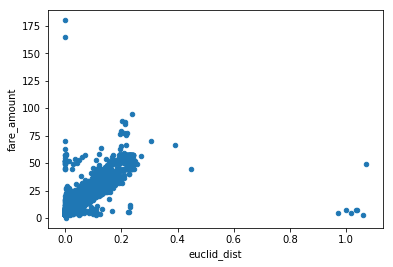

In [14]:
plot = train_df.iloc[:10000].plot.scatter('euclid_dist','fare_amount')

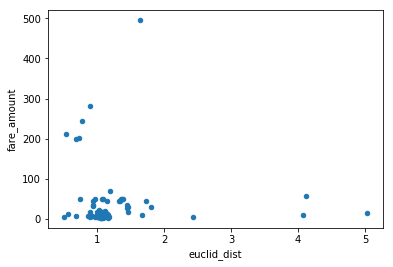

In [15]:
#When euclid distance is more than 0.5, you can still fit a line but most of the data points will be away from the line
x = train_df[train_df.euclid_dist>0.5]
plot = x.iloc[:100].plot.scatter('euclid_dist','fare_amount')

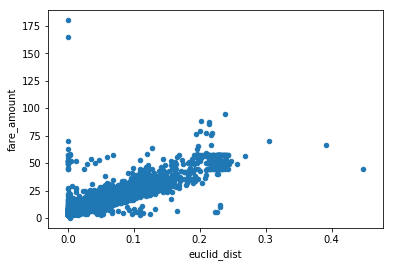

In [16]:
#When euclid distance is less than 0.5, one can fit a line such that most data points will be close to it
x = train_df[train_df.euclid_dist<0.5]
plot = x.iloc[:10000].plot.scatter('euclid_dist','fare_amount')

In [17]:
#Convert pickup date time string to a pandas datetime object

from datetime import timedelta, datetime
from pandas import DataFrame, Series

lines = train_df['pickup_datetime']

dt_lst = []

for date_str in lines:
    dt = datetime.strptime(date_str, '%Y-%m-%d %H:%M:%S UTC')
    seconds_since_midnight = int((dt - dt.replace(hour=0, minute=0, second=0, microsecond=0)).total_seconds())
    dt_lst.append(seconds_since_midnight)    

# Create a Series named "Request_Time"
sr_dt = Series(dt_lst, name='Second_Of_Day') 

# Create a DataFrame using the Request_Time Series
df = DataFrame(sr_dt)
df['fare_amount'] = train_df['fare_amount']
df['euclid_dist'] = train_df['euclid_dist']

In [18]:
df.corr()

,Second_Of_Day,fare_amount,euclid_dist
Second_Of_Day,1.000000,-0.000365,-0.000165
fare_amount,-0.000365,1.000000,0.725529
euclid_dist,-0.000165,0.725529,1.000000


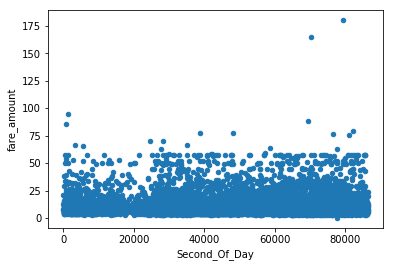

In [19]:
plot = df.iloc[:10000].plot.scatter('Second_Of_Day','fare_amount')

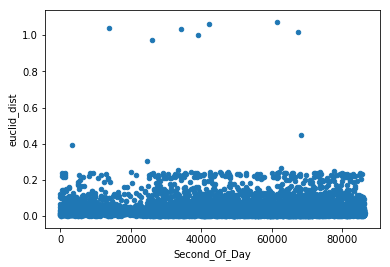

In [20]:
plot = df.iloc[:10000].plot.scatter('Second_Of_Day','euclid_dist')

In [21]:
# Model 1 : A simple linear regression model that uses the feature euclidean distance to predict taxi fare
import matplotlib.pyplot as plt
from scipy import stats

xi = train_df['euclid_dist']
y = train_df['fare_amount']

#Train the model on train data
slope, intercept, r_value, p_value, std_err = stats.linregress(xi,y)

print ('r value', r_value)
print  ('p_value', p_value)
print ('standard deviation', std_err)
print ('slope is:', slope)
print ("r-squared:", r_value**2)

#Check the model fit
#plt.plot(xi, y, 'o', label='original data')
#plt.plot(xi, intercept + slope*xi, 'r', label='fitted line')
#plt.legend()
#plt.show()

r value 0.7265459653520138
p_value 0.0
standard deviation 0.04594354813355792
slope is: 152.05748221076286
r-squared: 0.5278690397692896


In [22]:
#Test the model on test data
test_df = pd.read_csv('../input/test.csv')
add_euclid_distance_feature(test_df)

xi = test_df['euclid_dist']

test_y_predictions=[]
for x in xi:
    y = round(slope*x + intercept, 2)    
    test_y_predictions.append(y)

# Write the predictions to a CSV file which we can submit to the competition.
submission = pd.DataFrame(
    {'key': test_df.key, 'fare_amount': test_y_predictions},
    columns = ['key', 'fare_amount'])
submission.to_csv('submission.csv', index = False)

print(os.listdir('.'))

['.ipynb_checkpoints', 'best score.JPG', 'distance vs fare.png', 'kaggle new york city taxi fare prediction challenge.ipynb', 'kaggle new york city taxi fare prediction challenge.pdf', 'kaggle new york city taxi fare prediction challenge.py', 'special - distance vs fare.png', 'submission.csv', 'time of day vs distance.png', 'time of day vs fare.png']


In [23]:
# Model 2 : Use random forest regressor model that uses the feature euclidean distance to predict taxi fare
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.model_selection import cross_val_score
# build the model with the desired parameters...
numFeatures = 1 # the number of features to inlcude
train_df_mini = train_df[:1000000]
trees = 10 # trees in the forest
included_features = ['euclid_dist']
# define the training data X...
X = train_df_mini[included_features]
Y = train_df_mini[['fare_amount']]
yt = [i for i in Y['fare_amount']]
np.random.seed(11111)
model = rfr(n_estimators=trees,max_depth=None)
scores_rfr = cross_val_score(model,X,yt,cv=10,scoring='explained_variance')
print('explained variance scores for k=10 fold validation:',scores_rfr)
print("Est. explained variance: %0.2f (+/- %0.2f)" % (scores_rfr.mean(), scores_rfr.std() * 2))
# fit the model
model.fit(X,yt)

explained variance scores for k=10 fold validation: [0.66106363 0.68731691 0.64530205 0.66802214 0.67827483 0.69672725
 0.70530754 0.69416429 0.69226933 0.6774113 ]
Est. explained variance: 0.68 (+/- 0.03)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [24]:
# apply the model to the test data and get the output...
X_test = test_df[included_features]
y_output = model.predict(X_test.fillna(0)) # get the results and fill nan's with 0
print(y_output)

test_y_predictions=[]
for elem in y_output:
    test_y_predictions.append(round(elem,2))

[ 8.44973482  9.0342475   4.74166667 ... 42.648      21.472
  6.15284377]


In [25]:
# Write the predictions to a CSV file which we can submit to the competition.
submission = pd.DataFrame(
    {'key': test_df.key, 'fare_amount': test_y_predictions},
    columns = ['key', 'fare_amount'])
submission.to_csv('submission.csv', index = False)

print(os.listdir('.'))

['.ipynb_checkpoints', 'best score.JPG', 'distance vs fare.png', 'kaggle new york city taxi fare prediction challenge.ipynb', 'kaggle new york city taxi fare prediction challenge.pdf', 'kaggle new york city taxi fare prediction challenge.py', 'special - distance vs fare.png', 'submission.csv', 'time of day vs distance.png', 'time of day vs fare.png']


In [26]:
# Model 3 : Use LightGBM decision tree model that uses multiple features to predict taxi fare
import lightgbm as lgb
# load or create your dataset
print('Load data...')

included_features = ['euclid_dist','passenger_count','pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude']
train_X = train_df[included_features]
train_y = train_df['fare_amount']

params = {
        'nthread': -1,  
    }
#Default Parameters

train_set = lgb.Dataset(train_X, train_y, silent=True)
model3 = lgb.train(params, train_set = train_set, num_boost_round=300)

Load data...


In [27]:
model3.save_model('modellgbm.txt')
print('Start predicting...')
X_test = test_df[included_features] 
# predict
y_pred = model3.predict(X_test, num_iteration=model3.best_iteration)

Start predicting...


In [28]:
test_y_predictions=[]
for elem in y_pred:
    test_y_predictions.append(round(elem,2))
    
# Write the predictions to a CSV file which we can submit to the competition.
submission = pd.DataFrame(
    {'key': test_df.key, 'fare_amount': test_y_predictions},
    columns = ['key', 'fare_amount'])
submission.to_csv('submission.csv', index = False)

print(os.listdir('.'))

['.ipynb_checkpoints', 'best score.JPG', 'distance vs fare.png', 'kaggle new york city taxi fare prediction challenge.ipynb', 'kaggle new york city taxi fare prediction challenge.pdf', 'kaggle new york city taxi fare prediction challenge.py', 'modellgbm.txt', 'special - distance vs fare.png', 'submission.csv', 'time of day vs distance.png', 'time of day vs fare.png']
